<a href="https://colab.research.google.com/github/LuisDLCP/ProyectoFinal_MineriaDatos/blob/main/2)Generate_dataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generar un dataset, a partir de Imagenes filtradas**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab.patches import cv2_imshow
from skimage import io
from glob import glob
import pandas as pd
import numpy as np
import cv2
import os 

In [ ]:
root_path="./drive/MyDrive/Master_program/AprendizajeAutomatico/Proyecto_final/DataSet/"
pathInputFiles_con = root_path + "5)Data_binary/con_mask/"
pathInputFiles_sin = root_path + "5)Data_binary/sin_mask/"

1) Leer las Imagenes Binarizadas

In [ ]:
# Read images with mask 
archivos1 = glob(pathInputFiles_con+"*")
for file_i in archivos1:
  image_i = cv2.imread(file_i) 
  cv2_imshow(image_i)

2) Recortar Imagen (prueba)

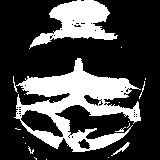

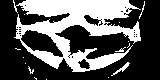

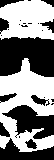

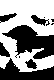

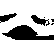

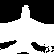

In [ ]:
image_i = cv2.imread(archivos1[15]) 
cv2_imshow(image_i)
# Corte Area 1
image_new = image_i[int(len(image_i)/2):,:]
cv2_imshow(image_new)
# Corte Area 2
image_new2 = image_i[:,int(len(image_i)/3):-int(len(image_i)/3)]
cv2_imshow(image_new2)
# Corte Area 3
image_new3 = image_i[int(len(image_i)/2):,int(len(image_i)/3):-int(len(image_i)/3)]
cv2_imshow(image_new3)
# Corte Area 4
image_new4 = image_i[int(len(image_i)/2):-int(len(image_i)/4),int(len(image_i)/3):-int(len(image_i)/3)]
cv2_imshow(image_new4)
# Corte Area 5
image_new5 = image_i[int(len(image_i)/3):-int(len(image_i)/3),int(len(image_i)/3):-int(len(image_i)/3)]
cv2_imshow(image_new5)

3) Calcular los Atributos

In [ ]:
# Generate dataset as df 
archivos1 = glob(pathInputFiles_con+"*")
archivos2 = glob(pathInputFiles_sin+"*")
archivos = archivos1 + archivos2
lista_promedio1 = []
lista_suma1 = []
lista_std1 = []

lista_promedio2 = []
lista_suma2 = []
lista_std2 = []

lista_promedio3 = []
lista_suma3 = []
lista_std3 = []

lista_promedio4 = []
lista_suma4 = []
lista_std4 = []

lista_promedio5 = []
lista_suma5 = []
lista_std5 = []

lista_clase = []
lista_id = []

for file_i in archivos:
  image_i = io.imread(file_i) 
  
  image_new1 = image_i[int(len(image_i)/2):,:] # Area1: 1/2 de la imagen | [0;255]
  image_new1 = image_new1/np.max(image_new1) # [0;1]
  image_new1 = image_new1.astype('int')

  image_new2 = image_i[:,int(len(image_i)/3):-int(len(image_i)/3)] # Area2: 1/3 de la imagen | [0;255]
  image_new2 = image_new2/np.max(image_new2) # [0;1]
  image_new2 = image_new2.astype('int')

  image_new3 = image_i[int(len(image_i)/2):,int(len(image_i)/3):-int(len(image_i)/3)] # Area3: 1/6 de la imagen | [0;255]
  image_new3 = image_new3/np.max(image_new3) # [0;1]
  image_new3 = image_new3.astype('int')

  image_new4 = image_i[int(len(image_i)/2):-int(len(image_i)/4),int(len(image_i)/3):-int(len(image_i)/3)] # Area4: 1/12 de la imagen | [0;255]
  image_new4 = image_new4/np.max(image_new4) # [0;1]
  image_new4 = image_new4.astype('int')

  image_new5 = image_i[int(len(image_i)/3):-int(len(image_i)/3),int(len(image_i)/3):-int(len(image_i)/3)] # Area5: 1/12 de la imagen | [0;255]
  image_new5 = image_new5/np.max(image_new5) # [0;1]
  image_new5 = image_new5.astype('int')

  # Area 1
  lista_suma1.append(np.sum(image_new1)) # Atributo 2
  lista_std1.append(np.std(image_new1)) # Atributo 3 
  if np.sum(image_new1)==0: # Atributo 1
    lista_promedio1.append(0)
  else:
    lista_promedio1.append(np.average(image_new1)) 

  # Area 2
  lista_suma2.append(np.sum(image_new2)) # Atributo 5
  lista_std2.append(np.std(image_new2)) # Atributo 6
  if np.sum(image_new2)==0: # Atributo 4
    lista_promedio2.append(0)
  else:
    lista_promedio2.append(np.average(image_new2)) 

  # Area 3
  lista_suma3.append(np.sum(image_new3)) # Atributo 5
  lista_std3.append(np.std(image_new3)) # Atributo 6
  if np.sum(image_new3)==0: # Atributo 4
    lista_promedio3.append(0)
  else:
    lista_promedio3.append(np.average(image_new3)) 

  # Area 4
  lista_suma4.append(np.sum(image_new4)) # Atributo 5
  lista_std4.append(np.std(image_new4)) # Atributo 6
  if np.sum(image_new4)==0: # Atributo 4
    lista_promedio4.append(0)
  else:
    lista_promedio4.append(np.average(image_new4)) 

  # Area 5
  lista_suma5.append(np.sum(image_new5)) # Atributo 5
  lista_std5.append(np.std(image_new5)) # Atributo 6
  if np.sum(image_new5)==0: # Atributo 4
    lista_promedio5.append(0)
  else:
    lista_promedio5.append(np.average(image_new5)) 

  # clase
  file_name = file_i.split("/")[-1]
  if file_name[:3]=='sin':
    lista_clase.append(0)
  elif file_name[:3]=='con':
    lista_clase.append(1)
  else:
    lista_clase.append(2)

  # id
  lista_id.append(file_name)

# Convert to df
df = pd.DataFrame(list(zip(lista_id,
                           lista_promedio1,lista_suma1, lista_std1,
                           lista_promedio2,lista_suma2, lista_std2, 
                           lista_promedio3,lista_suma3, lista_std3, 
                           lista_promedio4,lista_suma4, lista_std4, 
                           lista_promedio5,lista_suma5, lista_std5, 
                           lista_clase)), 
                  columns=['ID',
                           'Promedio1', 'Suma1', 'STD1',
                           'Promedio2', 'Suma2', 'STD2',
                           'Promedio3', 'Suma3', 'STD3',
                           'Promedio4', 'Suma4', 'STD4',
                           'Promedio5', 'Suma5', 'STD5',
                           'Clase'])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5,Clase
0,con_mask1.png,0.101641,1301,0.302175,0.052199,451,0.222428,0.078472,339,0.268913,0.130093,281,0.336405,0.127915,373,0.333995,1
1,con_mask2.png,0.470391,6021,0.499123,0.272106,2351,0.445044,0.544213,2351,0.498041,0.745833,1611,0.435392,0.364198,1062,0.481204,1
2,con_mask3.png,0.255937,3276,0.436387,0.444792,3843,0.496943,0.488889,2112,0.499877,0.720370,1556,0.448817,0.774005,2257,0.418236,1
3,con_mask4.png,0.083203,1065,0.276189,0.085417,738,0.279501,0.167130,722,0.373092,0.333796,721,0.471568,0.243484,710,0.429185,1
4,con_mask5.png,0.403984,5171,0.490694,0.593403,5127,0.491198,0.718056,3102,0.449946,0.997222,2154,0.052631,0.711248,2074,0.453182,1


In [ ]:
df.tail()

,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5,Clase
400,sin_mask238.png,0.017578,225,0.131412,0.038773,335,0.193054,0.040741,176,0.197689,0.081481,176,0.273573,0.095679,279,0.294151,0
401,sin_mask239.png,0.067109,859,0.250211,0.029051,251,0.167949,0.057870,250,0.233498,0.000000,0,0.000000,0.000343,1,0.018515,0
402,sin_mask240.png,0.120234,1539,0.325235,0.005556,48,0.074328,0.005093,22,0.071180,0.009722,21,0.098121,0.013717,40,0.116315,0
403,sin_mask241.png,0.118047,1511,0.322664,0.165856,1433,0.371952,0.177546,767,0.382130,0.287037,620,0.452379,0.257202,750,0.437091,0
404,sin_mask242.png,0.021797,279,0.146020,0.040856,353,0.197958,0.043519,188,0.204021,0.039352,85,0.194431,0.007888,23,0.088461,0


In [ ]:
# Save as excel 
df.to_excel(root_path + 'dataset2.xlsx', index=False)
df.to_csv(root_path + 'dataset2.csv')

In [ ]:
df.describe()

,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5,Clase
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,0.108442,1388.061728,0.232817,0.131906,1139.664198,0.244860,0.173245,748.419753,0.238729,0.246631,532.723457,0.242707,0.180209,525.488889,0.261898,0.402469
std,0.135022,1728.279454,0.156055,0.153151,1323.225004,0.176719,0.232797,1005.683757,0.179608,0.306707,662.486669,0.182051,0.202845,591.495054,0.195431,0.491002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009766,125.000000,0.098337,0.004977,43.000000,0.070371,0.003472,15.000000,0.058823,0.003704,8.000000,0.056835,0.002401,7.000000,0.048937,0.000000
50%,0.048750,624.000000,0.215345,0.063889,552.000000,0.244555,0.046528,201.000000,0.210625,0.081481,176.000000,0.242896,0.086763,253.000000,0.281487,0.000000
75%,0.160547,2055.000000,0.367112,0.221412,1913.000000,0.415197,0.251852,1088.000000,0.407275,0.413426,893.000000,0.430032,0.319273,931.000000,0.463478,1.000000
max,0.630703,8073.000000,0.499848,0.594907,5140.000000,0.499706,0.901852,3896.000000,0.500000,0.997222,2154.000000,0.500000,0.774005,2257.000000,0.499998,1.000000
